...

In [3]:
import pandas as pd
import matplotlib.style as mplstyle

from functions import *

mplstyle.use(['ggplot', 'fast'])

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# a)

In [4]:
# Various number of data points and polynomial degrees
n_vals = np.arange(20, 210, 20)
p_vals = np.arange(2, 16)

In [5]:
results = []

for n in n_vals:
    x, y = make_data(n)

    for p in p_vals:
        X = polynomial_features(x, p, intercept=True)
        X, y = standardize(X, y)
        X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)

        theta = OLS_parameters(X_train, y_train)
        y_pred = X_test @ theta

        results.append({'n': n, 'p': p, 'theta': theta, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_OLS = pd.DataFrame(results)

Text(0.5, 0.98, 'OLS')

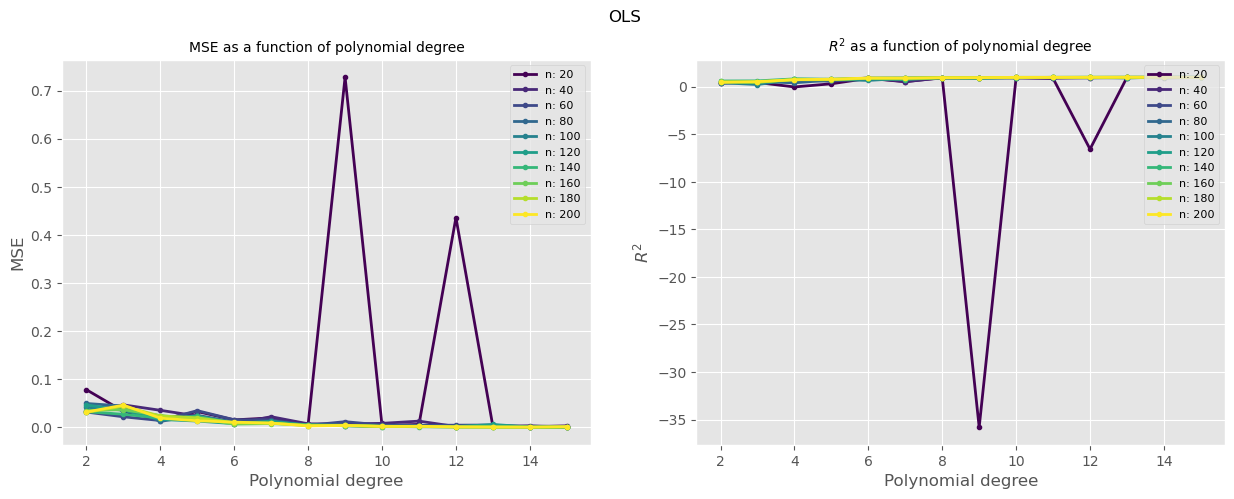

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[0].set_title('MSE as a function of polynomial degree', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[1].plot(n_df['p'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[1].set_title(r'$R^2$ as a function of polynomial degree', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')

Text(0.5, 0.98, 'OLS')

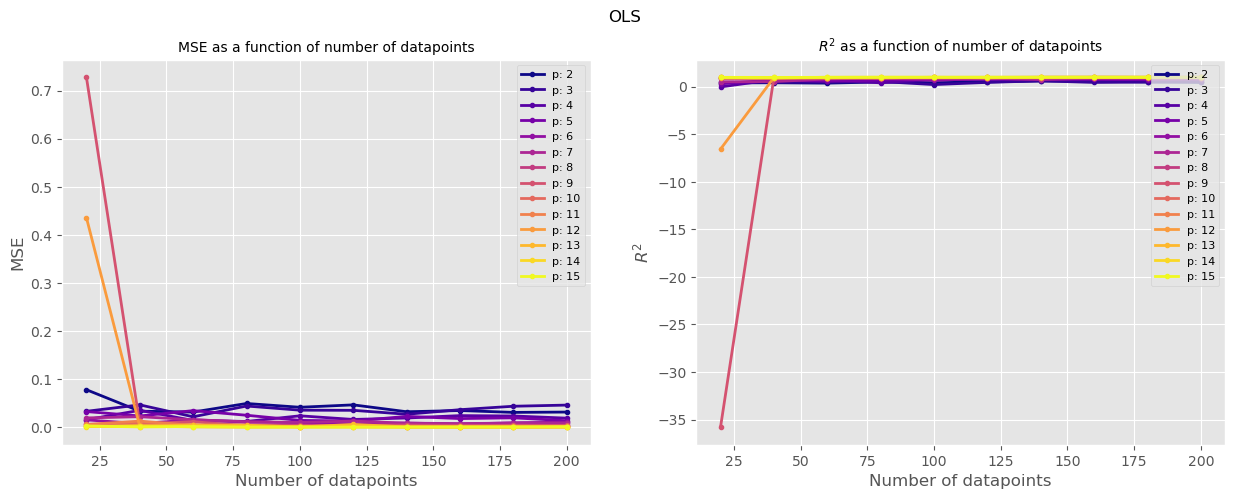

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='plasma'
num_colors = len(p_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[0].plot(p_df['n'], p_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[0].set_title('MSE as a function of number of datapoints', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Number of datapoints')
ax[0].set_ylabel('MSE')

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[1].plot(p_df['n'], p_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[1].set_title(r'$R^2$ as a function of number of datapoints', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Number of datapoints')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')

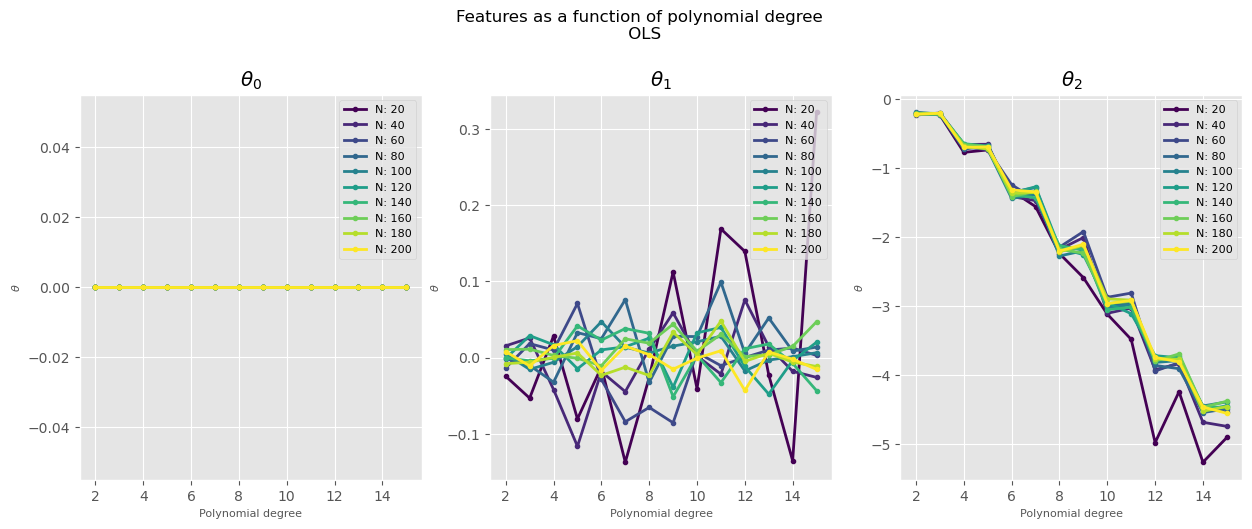

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

colormap='viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
    ax[1].plot(n_df['p'], n_df['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
    ax[2].plot(n_df['p'], n_df['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(f'Features as a function of polynomial degree \n OLS', y=1.05)

for axs in ax:
    axs.legend(loc='upper right', fontsize=8)
    axs.set_xlabel('Polynomial degree', fontsize=8)
    axs.set_ylabel(r'$\theta$', fontsize=8)

# b)

In [9]:
lambdas = np.logspace(-4, 2, 15)

In [10]:
results = []

for n in n_vals:
    x, y = make_data(n)

    for p in p_vals:
        for l in lambdas:
            X = polynomial_features(x, p, intercept=False)
            X, y = standardize(X, y)
            X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)

            theta = Ridge_parameters(X_train, y_train)
            y_pred = X_test @ theta

            results.append({'n': n, 'p': p, 'theta': theta, 'lambda': l, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_Ridge = pd.DataFrame(results)

Text(0.5, 0.98, 'Ridge \n Datapoints: 200')

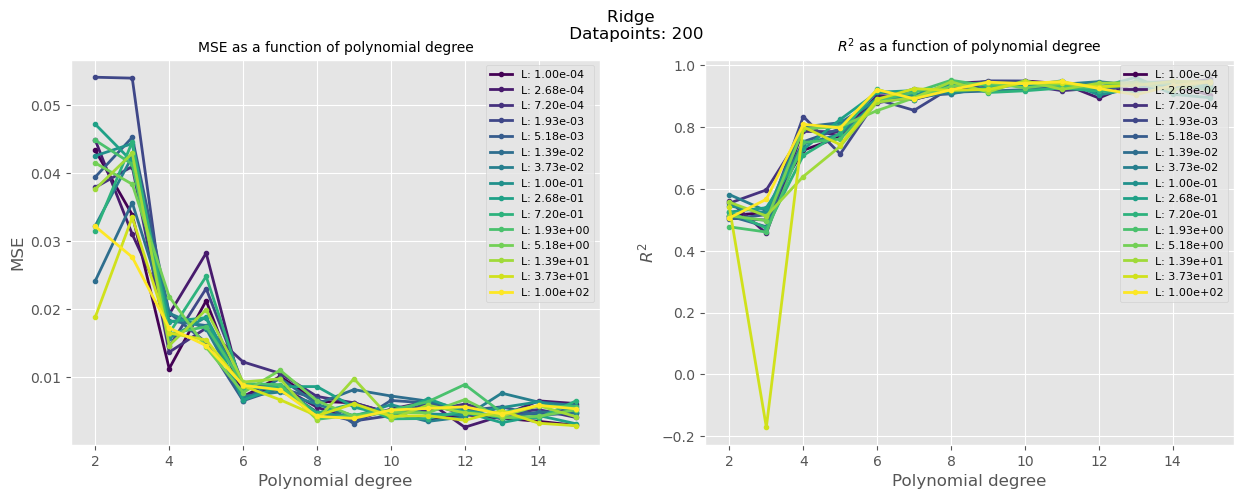

In [11]:
# Choosing a n-value to plot for
n_val = n_vals[-1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(lambdas)
cmap = plt.get_cmap(colormap, num_colors)

for i, l in enumerate(lambdas):
    n_df = n_df = df_Ridge[(df_Ridge['lambda'] == l) & (df_Ridge['n'] == n_val)]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'L: {l:.2e}')
    ax[1].plot(n_df['p'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'L: {l:.2e}')

ax[0].set_title('MSE as a function of polynomial degree', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].set_title(r'$R^2$ as a function of polynomial degree', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'Ridge \n Datapoints: {n_val}')

Text(0.5, 0.98, 'Ridge \n Datapoints: 200')

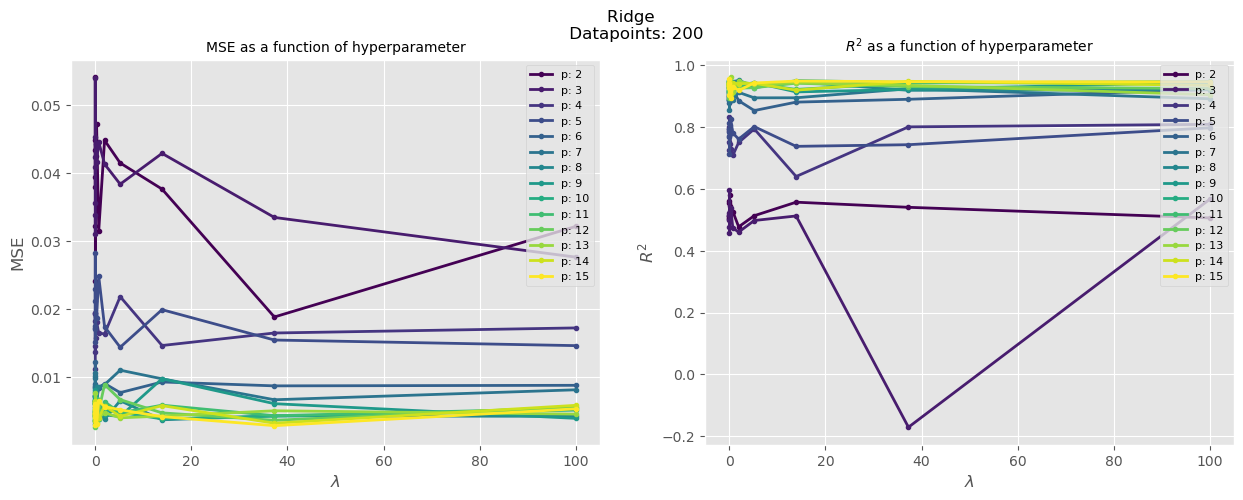

In [12]:
# Choosing a n-value to plot for
n_val = n_vals[-1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(p_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, pe in enumerate(p_vals):
    n_df = n_df = df_Ridge[(df_Ridge['p'] == pe) & (df_Ridge['n'] == n_val)]
    color = cmap(i) 
    ax[0].plot(n_df['lambda'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe:.0f}')
    ax[1].plot(n_df['lambda'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe:.0f}')

ax[0].set_title('MSE as a function of hyperparameter', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel(r'$\lambda$')
ax[0].set_ylabel('MSE')

ax[1].set_title(r'$R^2$ as a function of hyperparameter', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'Ridge \n Datapoints: {n_val}')

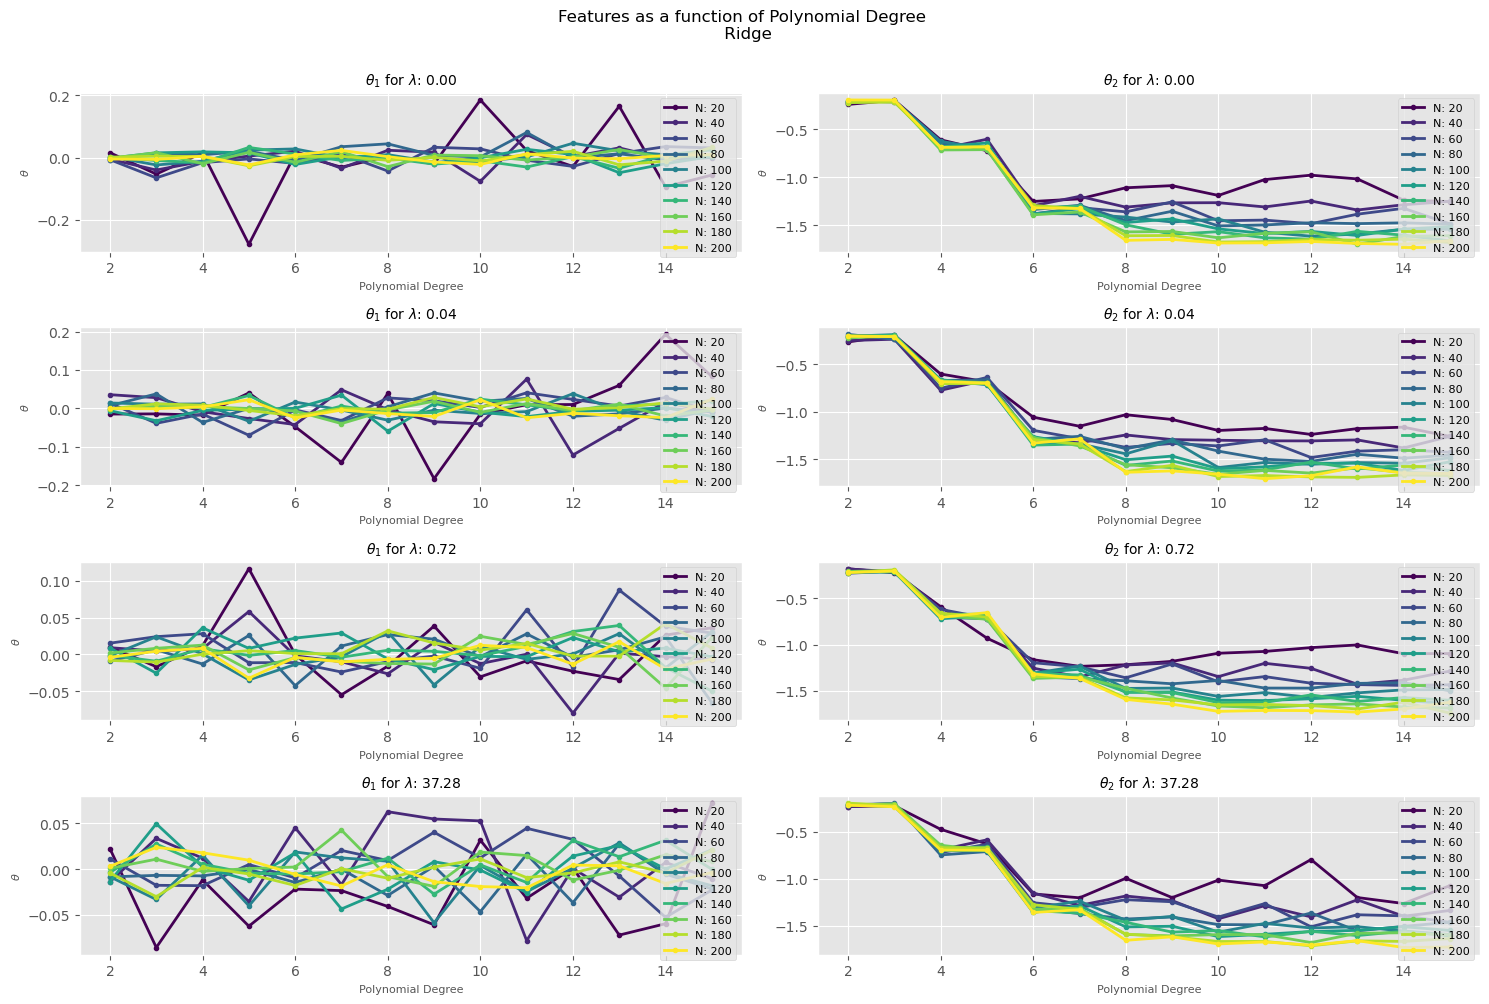

In [13]:
# Selecting specific lambda values to plot
lambda_subset = [lambdas[3], lambdas[6], lambdas[9], lambdas[13]]

fig, ax = plt.subplots(4, 2, figsize=(15, 10))
colormap = 'viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for j, l_val in enumerate(lambda_subset):
    for i, en in enumerate(n_vals):
        n_df = df_Ridge[(df_Ridge['n'] == en) & (df_Ridge['lambda'] == l_val)]
        color = cmap(i)
        ax[j, 0].plot(n_df['p'], n_df['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
        ax[j, 1].plot(n_df['p'], n_df['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')

    ax[j, 0].set_title(r'$\theta_1$ for $\lambda$: ' + f'{l_val:.2f}', fontsize=10)
    ax[j, 1].set_title(r'$\theta_2$ for $\lambda$: ' + f'{l_val:.2f}', fontsize=10)

fig.suptitle('Features as a function of Polynomial Degree \n Ridge', y=1.0)

for axs in ax.flatten():
    axs.set_xlabel('Polynomial Degree', fontsize=8)
    axs.set_ylabel(r'$\theta$', fontsize=8)
    axs.legend(loc='upper right', fontsize=8)

fig.tight_layout()